In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv')


In [3]:
df.head()

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00816,0.0
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,0,1,1,0.0,0.00048,0.0
2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,0,1,0.0,0.00048,0.0
4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0


In [4]:
ultimo = df.date.tail(1).tolist()
df.city.loc[(df['state'] == 'SP')].unique()



array(['São Paulo/SP', 'CASO SEM LOCALIZAÇÃO DEFINIDA/SP',
       'Santana de Parnaíba/SP', 'Ferraz de Vasconcelos/SP',
       'Carapicuíba/SP', 'Mauá/SP', 'Santo André/SP',
       'São Bernardo do Campo/SP', 'São Caetano do Sul/SP',
       'Guarulhos/SP', 'Barueri/SP', 'Campinas/SP', 'Cotia/SP',
       'Jaguariúna/SP', 'Osasco/SP', 'São José do Rio Preto/SP',
       'São José dos Campos/SP', 'Suzano/SP', 'Taubaté/SP',
       'Vargem Grande Paulista/SP', 'Hortolândia/SP',
       'Mogi das Cruzes/SP', 'Caieiras/SP', 'Embu das Artes/SP',
       'Iracemápolis/SP', 'Jundiaí/SP', 'Poá/SP', 'Ribeirão Pires/SP',
       'Rio Claro/SP', 'São Sebastião/SP', 'Taboão da Serra/SP',
       'Valinhos/SP', 'Arujá/SP', 'Louveira/SP', 'Mairiporã/SP',
       'Ribeirão Preto/SP', 'Tatuí/SP', 'Diadema/SP', 'Sorocaba/SP',
       'Brodowski/SP', 'Cajamar/SP', 'Itapevi/SP', 'Itupeva/SP',
       'Jandira/SP', 'Paulínia/SP', 'Penápolis/SP', 'Piracicaba/SP',
       'Porto Feliz/SP', 'Santos/SP', 'São Pedro/SP', 

In [5]:
setecidades = ['Santo André/SP', 'São Bernardo do Campo/SP', 'São Caetano do Sul/SP', 'Diadema/SP','Mauá/SP','Ribeirão Pires/SP', 'Rio Grande da Serra/SP']


In [6]:
dfsetecidades = df[df['city'].isin(setecidades)]

In [7]:
dfsetecidades.date= pd.to_datetime(dfsetecidades.date)

/home/caio/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
df_pivot = dfsetecidades.pivot(index='date', columns='city', values='totalCases')
df_pivot.fillna(0, inplace=True)
cidades = list(df_pivot.columns)
for col in df_pivot.columns:
    df_pivot[col] = pd.to_numeric(df_pivot[col], downcast='integer')
covid = df_pivot.reset_index('date')
covid.set_index(['date'],inplace=True)
#covid= df_pivot.reset_index('date')
#covid.set_index(['date'],inplace=True)

covid.columns = cidades


In [9]:
df_pivot100 = dfsetecidades.pivot(index='date', columns='city', values='totalCases_per_100k_inhabitants')
df_pivot100.fillna(0, inplace=True)
for col in df_pivot100.columns:
    df_pivot100[col] = round(df_pivot100[col], 2)
covid100 = df_pivot100.reset_index('date')
covid100.set_index(['date'],inplace=True)


covid100.columns = cidades

Text(2020-03-16 00:00:00, -48.940999999999995, 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv')

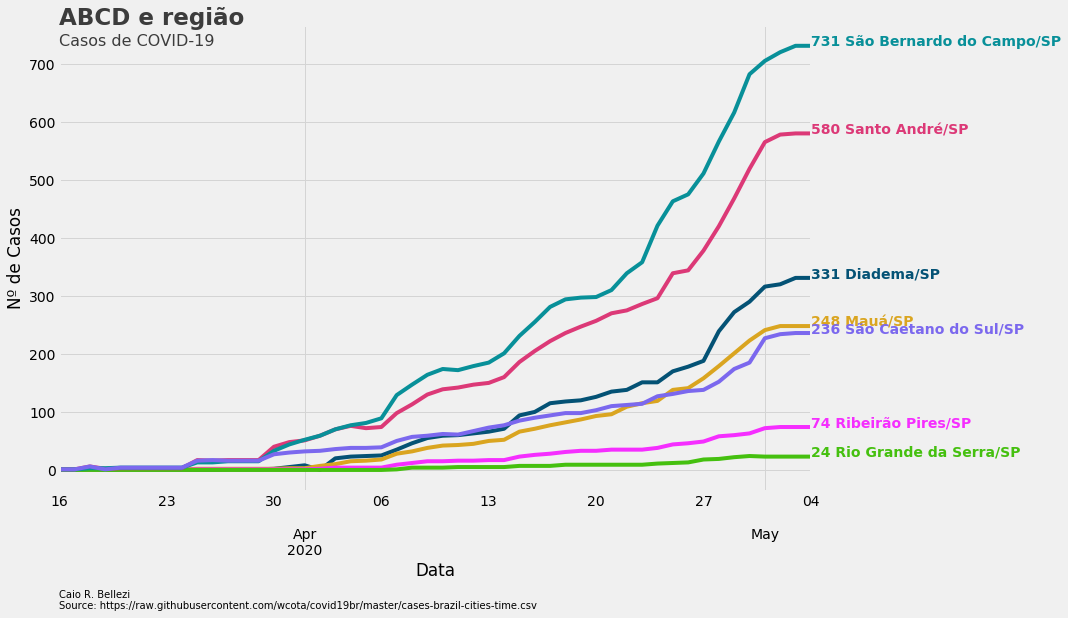

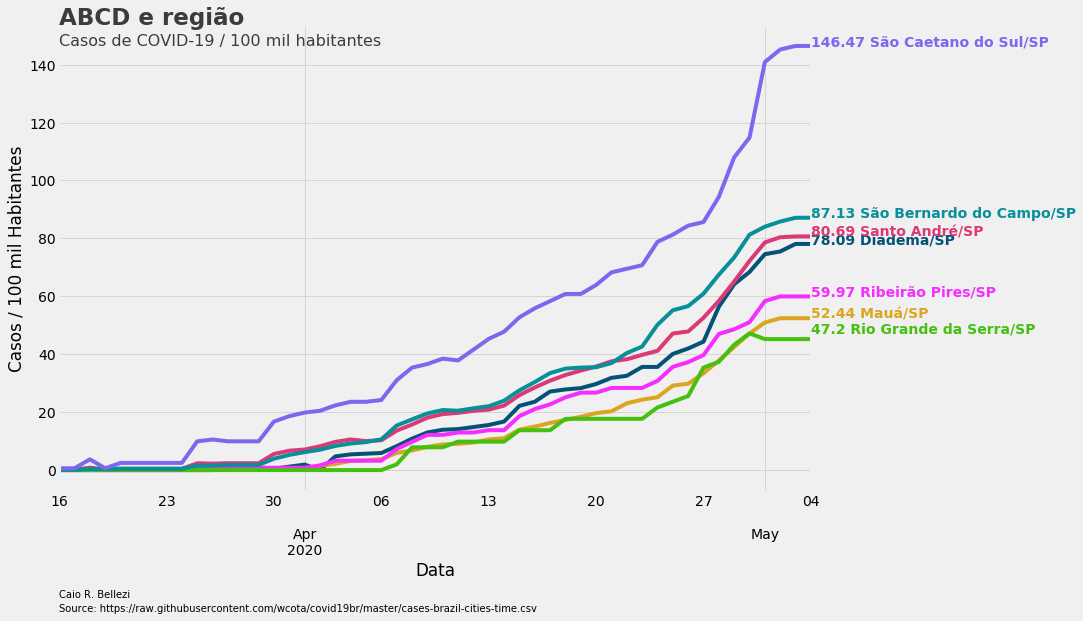

In [10]:
colors = {'Diadema/SP':'#045275','Mauá/SP':'#DAA520','Ribeirão Pires/SP':'#f52eff', 
          'Rio Grande da Serra/SP':'#45c00f','Santo André/SP':'#DC3977','São Bernardo do Campo/SP':'#089099',
          'São Caetano do Sul/SP':'#7B68EE'}
plt.style.use('fivethirtyeight')

plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=4, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Data')
plot.set_ylabel('Nº de Casos')

for cidade in list(colors.keys()):
    plot.text(x = (covid.index[-1]), y = covid[cidade].max(), color = colors[cidade], s =str(covid[cidade].max())+' '+cidade, weight = 'bold')

plot.text(x = covid.index[0], y = int(covid.max().max())*1.05, s = "ABCD e região", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[0], y = int(covid.max().max()), s = "Casos de COVID-19", fontsize = 16, alpha = .75)
plot.text(x = covid.index[0], y = int(covid.max().max())*-0.30,s = 'Caio R. Bellezi',multialignment='left' , fontsize = 10)
plot.text(x = covid.index[0], y = -20+int(covid.max().max())*-0.30,s = 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv',multialignment='left' , fontsize = 10)
            
    


plot100 = covid100.plot(figsize=(12,8), color=list(colors.values()), linewidth=4, legend=False)
plot100.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot100.grid(color='#d4d4d4')
plot100.set_xlabel('Data')
plot100.set_ylabel('Casos / 100 mil Habitantes')

for cidade in list(colors.keys()):
    plot100.text(x = (covid100.index[-1]), y = covid100[cidade].max(), color = colors[cidade], s =str(covid100[cidade].max())+' '+cidade, weight = 'bold')

plot100.text(x = covid100.index[0], y = (covid100.max().max())*1.05, s = "ABCD e região", fontsize = 23, weight = 'bold', alpha = .75)
plot100.text(x = covid100.index[0], y = (covid100.max().max()), s = "Casos de COVID-19 / 100 mil habitantes", fontsize = 16, alpha = .75)
plot100.text(x = covid100.index[0], y = (covid100.max().max())*-0.30,s = 'Caio R. Bellezi',multialignment='left' , fontsize = 10)
plot100.text(x = covid100.index[0], y = -5+(covid100.max().max())*-0.30,s = 'Source: https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv',multialignment='left' , fontsize = 10)
                